# Statistical Learning Project
Leveraging customer information is paramount formost businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.

### Attribute Information: 
  - age: age of primary beneficiary
  - sex: insurance contractor gender, female, male
  - bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg/m^2) using the ratio of height to weight, ideally 18.5 to 24.9
  - children: Number of children covered by health insurance / Number of dependents
  - smoker: Smoking
  - region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
  - charges: Individual medical costs billed by health insurance.

### Perform Exploratory Data Analysis, Practicing statistics using Python and Hypothesis testing on the data that contains medical costs of people characterized by certain attributes.


## 1. Import the necessary libraries

In [1]:
# Import necessory libraries
import pandas as pd
import numpy as np
import seaborn as sns   # Why sns?  It's a reference to The West Wing
import matplotlib.pyplot as plt  # seaborn is based on matplotlib
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
import copy

sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 
# Tells python to actually display the graphs

## 2. Read the data as dataframe

In [2]:
# Read the dataframe using pandas or import the dataset using pandas df
insurance = pd.read_csv('insurance.csv') 

In [3]:
# Diplays 5 rows of dataset
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Diplays 10 rows of dataset
insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# 3. Perform basic EDA which should include the following and print out insights at every step
## 3.1 Shape of the data

In [5]:
# Shape of the data
print('Shape of Dataframe :')
insurance.shape # Returns tuple of shape (Rows, columns) of dataframe

Shape of Dataframe :


(1338, 7)

## 3.2 Datatype of each attribute

In [6]:
# The dtypes property is used to find the dtypes in the DataFrame.
print('Data type of each column of Dataframe :')
print(insurance.dtypes) # Returns a Series with the data type of each column

Data type of each column of Dataframe :
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [7]:
# It is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.
insurance.info() # This method prints a summary of a DataFrame and returns None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Observation
- The data has 1338 instances with 7 attributes. 2 integer type, 2 float type and 3 object (string) type.

## 3.3 Checking the presence of missing values

In [8]:
# Check for the null values 
insurance.isna().apply(pd.value_counts) 

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


In [9]:
# Making new data frame with dropped NA values 
new_insurance = insurance.dropna(axis = 0, how ='any') 
print("Old data frame length:", len(insurance), "\nNew data frame length:",  
       len(new_insurance), "\nNumber of rows with at least 1 NA value: ", 
       (len(insurance)-len(new_insurance))) 

Old data frame length: 1338 
New data frame length: 1338 
Number of rows with at least 1 NA value:  0


#### Observation
- No null values in the dataset.

## 3.4 5 Point summary of numerical attributes

### The five numbers that help describe the center, spread and shape of data are: 
- Xsmallest
- First Quartile (Q1)
- Median (Q2)
- Third Quartile (Q3)
- Xlargest

In [10]:
# Five point summary for the dataset

insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Observations
- Data looks accurate as all the statistics seem reasonable.
- Looking at the age column, data looks representative of the true age distribution of the adult population.
- Very few people have more than 2 children.
- The claimed amount is higly skewed as most people would require basic medi-care and only few suffer from diseases which cost more.

## 3.5 Distribution of BMI, AGE & CHARGES Columns

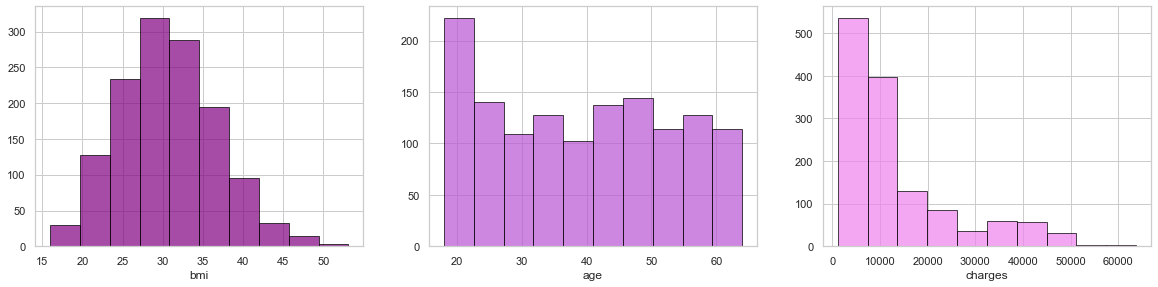

In [11]:
#Plots to see the distribution of the continuous features individually

sns.set_style("whitegrid") 
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(insurance.bmi, color='purple', edgecolor = 'black', alpha = 0.7)
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(insurance.age, color='mediumorchid', edgecolor = 'black', alpha = 0.7)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(insurance.charges, color='violet', edgecolor = 'black', alpha = 0.7)
plt.xlabel('charges')

plt.show()


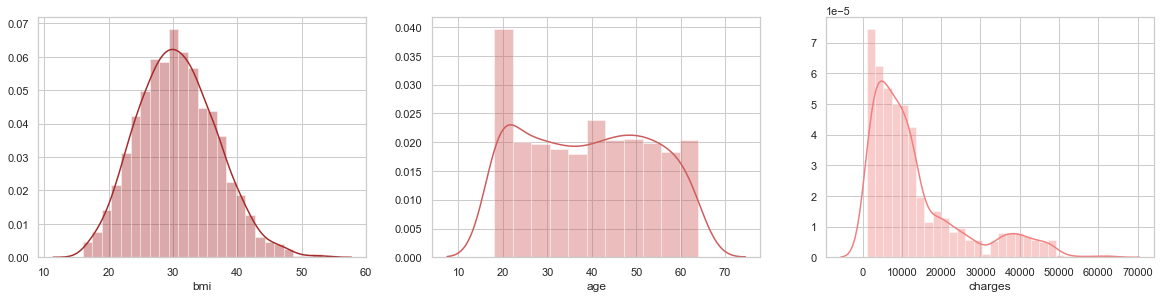

In [12]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.distplot(insurance.bmi, color='brown');

plt.subplot(3,3,2)
sns.distplot(insurance.age, color='indianred');

plt.subplot(3,3,3)
sns.distplot(insurance.charges, color='lightcoral');

#### Observation
- BMI looks quiet normally distributed.
- AGE distributed quiet uniformly.
- CHARGES are highly skewed.

## 3.6 Measure of skewness of BMI, AGE & CHARGES Columns

In [13]:
skewness = pd.DataFrame({'Skewness' : [stats.skew(insurance.bmi),stats.skew(insurance.age),stats.skew(insurance.charges)]},
                        index=['bmi','age','charges'])  # Measure the skeweness of the required columns
print("Skewness of BMI, AGE and CHARGES")
skewness

Skewness of BMI, AGE and CHARGES


,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


<AxesSubplot:>

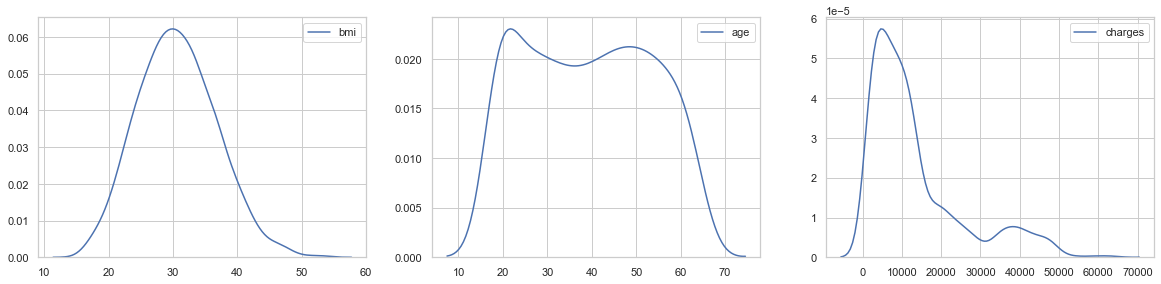

In [14]:
sns.set_style("whitegrid") 
plt.figure(figsize= (20,15))

plt.subplot(3,3,1)
sns.kdeplot(insurance.bmi)

plt.subplot(3,3,2)
sns.kdeplot(insurance.age)

plt.subplot(3,3,3)
sns.kdeplot(insurance.charges)

#### Observations
- BMI is very less skewed.
- AGE is uniformly distributed so there is almost no skew.
- CHARGES are highly skewed.

## 3.7 Checking the presence of outliers of BMI, AGE & CHARGES Columns

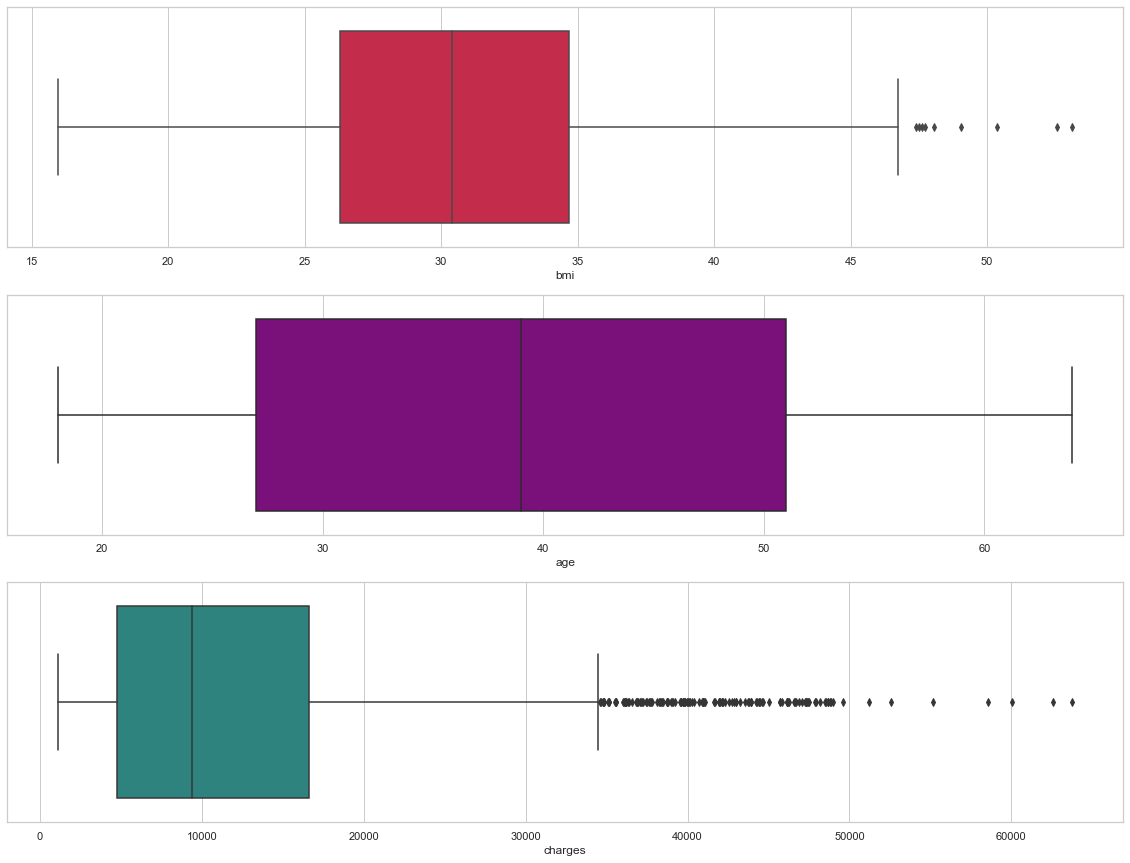

In [15]:
#Checking for the outliers
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x=insurance.bmi, color = 'crimson')

plt.subplot(3,1,2)
sns.boxplot(x= insurance.age, color = 'darkmagenta')

plt.subplot(3,1,3)
sns.boxplot(x= insurance.charges, palette="viridis")

plt.show()


#### Observations
- BMI has a few outliers.
- AGE has no outliers.
- CHARGES as it is highly skewed, there are quiet a lot of outliers.

## 3.8 Distribution of categorical columns

Text(0.5, 1.0, 'Children Distribution')

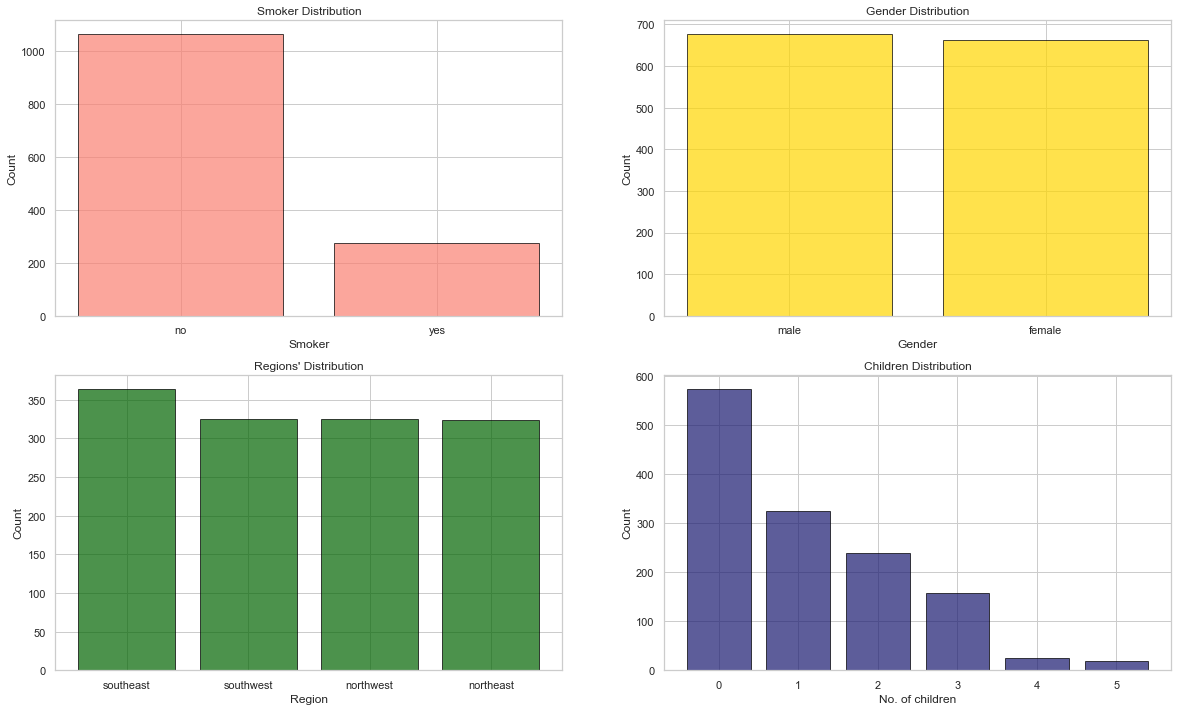

In [16]:
plt.figure(figsize=(20,25))


x = insurance.smoker.value_counts().index    # Values for x-axis
y = [insurance['smoker'].value_counts()[i] for i in x]   # Count of each class on y-axis

plt.subplot(4,2,1)
plt.bar(x,y, align='center',color = 'salmon',edgecolor = 'black',alpha = 0.7)  # Plot a bar chart
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.title('Smoker Distribution')

x1 = insurance.sex.value_counts().index    # Values for x-axis
y1 = [insurance['sex'].value_counts()[j] for j in x1]   # Count of each class on y-axis

plt.subplot(4,2,2)
plt.bar(x1,y1, align='center',color = 'gold',edgecolor = 'black',alpha = 0.7)  # Plot a bar chart
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')

x2 = insurance.region.value_counts().index    # Values for x-axis
y2 = [insurance['region'].value_counts()[k] for k in x2]   # Count of each class on y-axis

plt.subplot(4,2,3)
plt.bar(x2,y2, align='center',color = 'darkgreen',edgecolor = 'black',alpha = 0.7)  # Plot a bar chart
plt.xlabel('Region')
plt.ylabel('Count')
plt.title("Regions' Distribution")

x3 = insurance.children.value_counts().index    # Values for x-axis
y3 = [insurance['children'].value_counts()[l] for l in x3]   # Count of each class on y-axis

plt.subplot(4,2,4)
plt.bar(x3,y3, align='center',color = 'midnightblue',edgecolor = 'black',alpha = 0.7)  # Plot a bar chart
plt.xlabel('No. of children')
plt.ylabel('Count')
plt.title("Children Distribution")


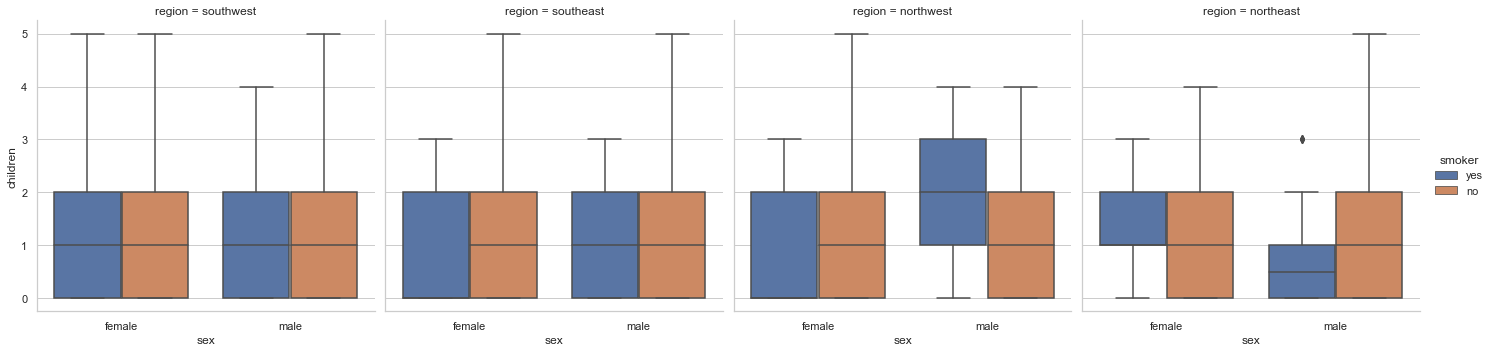

In [17]:
sns.catplot(x="sex",
               y = "children",
               hue="smoker", 
               col="region", 
               data=insurance, 
               kind="box");

#### Observations
- There are a non-smokers grater than smokers in the data.
- Gender is distributed evenly
- Instances are also distributed evenly accross all regions.
- Most instances have less than 2 children and very few have 4 or 5 children.

## 3.9 Pair plot that includes all the columns of the data frame

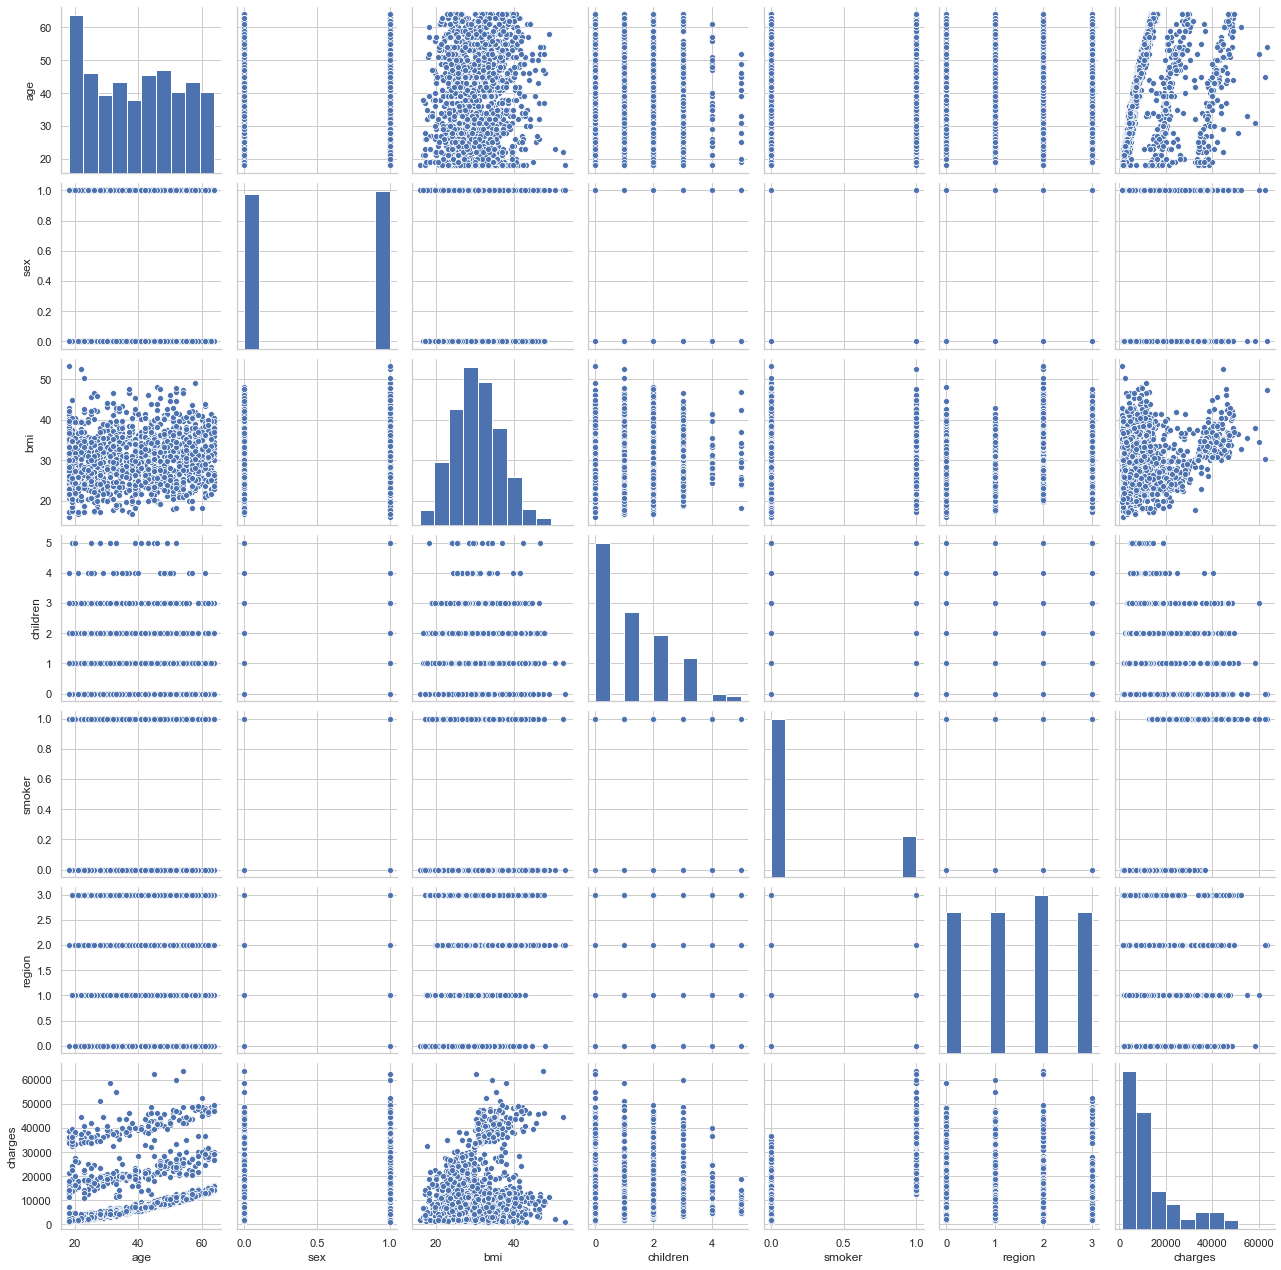

In [18]:
# Label encoding the variables before doing a pairplot because pairplot ignores strings
insurance_df = copy.deepcopy(insurance)
insurance_df.loc[:,['sex', 'smoker', 'region']] = insurance_df.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 

sns.pairplot(insurance_df)  # Pairplot
plt.show()

#### Observations
- The only obvious correlation of 'CHARGES' is with 'SMOKER'.
- Looks like smokers claimed more money than non-smokers.
- There's an interesting pattern between 'AGE' and 'CHARGES'. 

# 4. Answer the following questions with statistical evidence
## 4.1 Do charges of people who smoke differ significantly from the people who don't?

In [19]:
insurance.smoker.value_counts()  # Checking the distribution of smokers and non-smokers

no     1064
yes     274
Name: smoker, dtype: int64

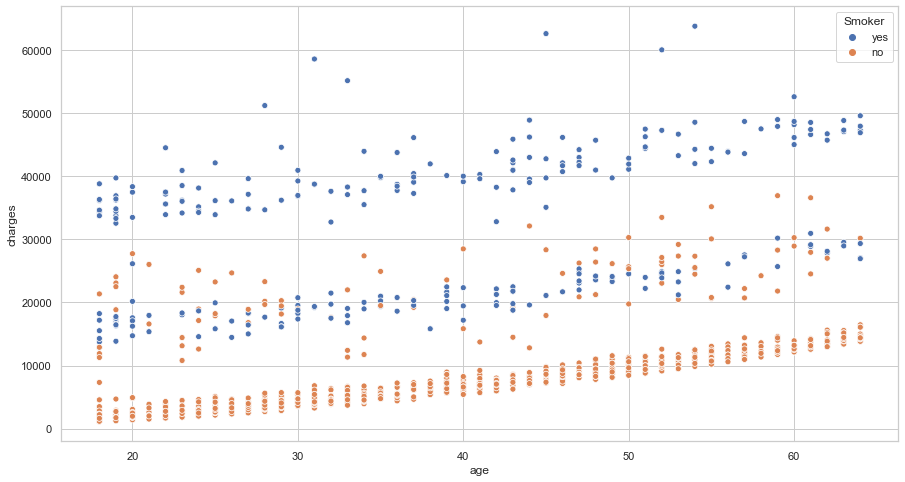

In [20]:
plt.figure(figsize=(15,8))
# With matplotlib version 3.3.1 a workaround is to send a list to hue, by using .tolist()

ax = sns.scatterplot(x="age", y="charges", hue=insurance.smoker.tolist(), data=insurance)
ax.legend(title='Smoker')  # add a title to the legend

In [21]:
# Hypothesis (T-test) to check dependency of smoking on charges
Ho = "Charges of smoker and non-smoker are same"   # Stating the Null Hypothesis
Ha = "Charges of smoker and non-smoker are not same"   # Stating the Alternate Hypothesis

x = np.array(insurance[insurance.smoker == 'yes'].charges)  # Selecting charges corresponding to smokers as an array
y = np.array(insurance[insurance.smoker == 'no'].charges) # Selecting charges corresponding to non-smokers as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  # Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05. The p-value is : ',p_value)
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05. The p-value is : ',p_value)

Charges of smoker and non-smoker are not same as the p_value (0.0) < 0.05. The p-value is :  8.271435842177219e-283


#### Observation
- Visually, the difference between charges of smokers and charges of non-smokers is apparent.
- Smokers seem to claim significantly more money than non-smokers.

## 4.2 Does bmi of males differ significantly from that of females?

In [22]:
insurance.sex.value_counts()   # Checking the distribution of males and females

male      676
female    662
Name: sex, dtype: int64

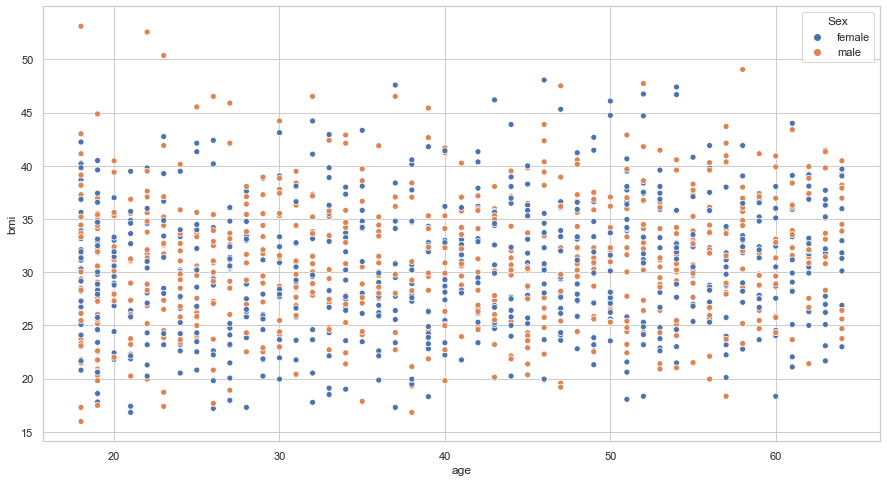

In [23]:
plt.figure(figsize=(15,8))
# With matplotlib version 3.3.1 a workaround is to send a list to hue, by using .tolist()

ax = sns.scatterplot(x="age", y="bmi", hue=insurance.sex.tolist(), data=insurance)
ax.legend(title='Sex')  # add a title to the legend

In [24]:
# Hypothesis (T-test) to check dependency of bmi on gender
Ho = "Gender has no effect on bmi"   # Stating the Null Hypothesis
Ha = "Gender has an effect on bmi"   # Stating the Alternate Hypothesis

x = np.array(insurance[insurance.sex == 'male'].bmi)  # Selecting bmi values corresponding to males as an array
y = np.array(insurance[insurance.sex == 'female'].bmi) # Selecting bmi values corresponding to females as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  # Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05. The p-value is : ',p_value)
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05. The p-value is : ',p_value)

Gender has no effect on bmi as the p_value (0.09) > 0.05. The p-value is :  0.08997637178984932


#### Observations
- Visually, there is no apparent relation between gender and bmi.
- BMI of both the genders are identical.

## 4.3 Is the proportion of smokers significantly different in different genders?

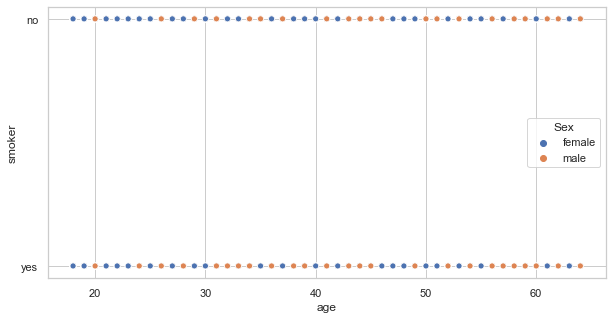

In [25]:
plt.figure(figsize=(10,5))
# With matplotlib version 3.3.1 a workaround is to send a list to hue, by using .tolist()

ax = sns.scatterplot(x="age", y="smoker", hue=insurance.sex.tolist(), data=insurance)
ax.legend(title='Sex')  # add a title to the legend

In [26]:
# Chi_square test to check if smoking habits are different for different genders
Ho = "Gender has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Gender has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(insurance['sex'],insurance['smoker'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05. The p-value is : ',p_value)
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05. The p-value is : ',p_value)
crosstab

Gender has an effect on smoking habits as the p_value (0.007) < 0.05. The p-value is :  0.006548143503580696


smoker,no,yes
sex,,
female,547,115
male,517,159


#### Observations
- Visually, the difference between smoker and gender is apparent.
- Proportion of smokers in males is significantly different from that of the females.

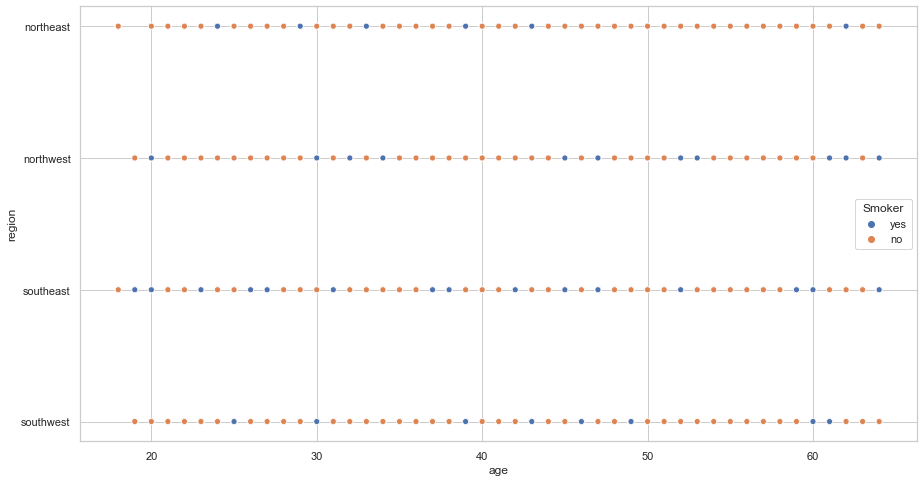

In [27]:
plt.figure(figsize=(15,8))
# With matplotlib version 3.3.1 a workaround is to send a list to hue, by using .tolist()

ax = sns.scatterplot(x="age", y="region", hue=insurance.smoker.tolist(), data=insurance)
ax.legend(title='Smoker')  # add a title to the legend

In [28]:
# Chi_square test to check if smoking habits are different for people of different regions
Ho = "Region has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Region has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(insurance['smoker'], insurance['region'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05. The p-value is : ',p_value)
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05. The p-value is : ',p_value)
crosstab

Region has no effect on smoking habits as the p_value (0.062) > 0.05. The p-value is :  0.06171954839170547


region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


#### Observations
- Visually, there is no apparent relation between smoker and region.
- Smoking habbits of people of different regions are similar.

## 4.4 Is the distribution of bmi across women with no children, one child and two children, the same?

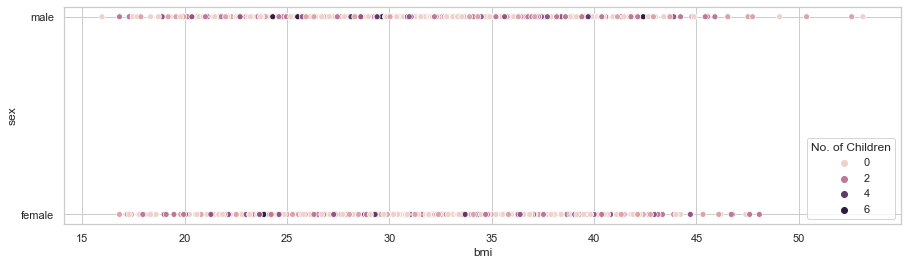

In [29]:
plt.figure(figsize=(15,4))
# With matplotlib version 3.3.1 a workaround is to send a list to hue, by using .tolist()

ax = sns.scatterplot(x="bmi", y="sex", hue=insurance.children.tolist(), data=insurance)
ax.legend(title='No. of Children')  # add a title to the legend

In [30]:
# Hypothesis Test to see if the distributions of bmi values for females having different number of children, are significantly different

Ho = "No. of children has no effect on bmi"   # Stating the Null Hypothesis
Ha = "No. of children has an effect on bmi"   # Stating the Alternate Hypothesis


female = copy.deepcopy(insurance[insurance['sex'] == 'female'])

zero = female[female.children == 0]['bmi']
one = female[female.children == 1]['bmi']
two = female[female.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05. The p-value is : ',p_value)
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05. The p-value is : ',p_value)


No. of children has no effect on bmi as the p_value (0.716) > 0.05. The p-value is :  0.7158579926754841


#### Observations
- Visually, there is no apparent relation between sex and bmi.
- BMI is not changed by the number of children.